In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random
import statistics

from ipywidgets import interact
import ipywidgets as widgets

In [84]:

def agrupa_genotipo(pop,N):
    random.shuffle(pop)
    pop_novo = []
    
    pop_novo.append( pop[0] + pop[1] )
    i=1
    while i < N :
        
        pop_novo.append( pop[i*2] + pop[(i*2) + 1]  )
        
        i+=1
    
    return pop_novo


def cria_pesos(pop,w1,w2,w3):
    pop = sorted(pop)
    pesos= []
    
    for i in range(len(pop)):
        if pop[i] == 0:
            pop[i] = 0
            pesos.append(w1)
            
        elif pop[i] == 1:#sorteia qual gene o ser heterozigoto passa para proxima geracao
            chance = random.randint(1,100)
            if chance <= 50:
                pop[i] = 0
                pesos.append(w1)
            else:
                pop[i] = 1
                pesos.append(w2)
                
        elif pop[i] == 2:
            pop[i] = 1
            pesos.append(w3)
        
    return pop , pesos
            

def calc_freq(pop,N):
    cont=0
    for i in range(len(pop)):
        cont += pop[i]
        
    return cont / N
        
    



In [85]:
def main(N,G,p0,w1,w2,w3):
    pop =[]
    freq = []

    populacao=[]

    for i in range(2*N): #cria primeira populacao aleatoria
        if i < (p0*2*N):
            pop.append(1)
        else:
            pop.append(0)


    pop = agrupa_genotipo(pop,N)

    for i in range(G):

        pop, pesos = cria_pesos(pop,w1,w2,w3)
        
    

        populacao.append(pop)# ter vetor de tamanho G

        pop = random.choices(pop, weights = pesos, k = 2*N)
    

        pop = agrupa_genotipo(pop,N)
        
    


    for i in range(len(populacao)): 

        freq.append( calc_freq(populacao[i], N) )



    return freq

<function matplotlib.pyplot.show>

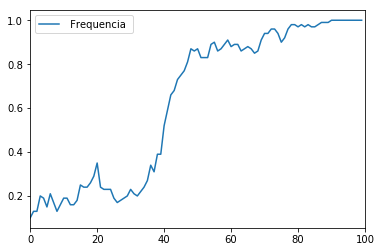

In [86]:
N = 100
G = 100
p0 =  0.1

w1 = 0.9
w2 = 0.95
w3 = 1


freq = main(N,G,p0,w1,w2,w3)

plt.plot( range(len(freq)) , freq , label = " Frequencia " )
#plt.scatter( range(len(freq)) , freq)

plt.xlim( [0, 100])#definir limites do grafico
#plt.ylim([0,0.12])#definir limites do grafico
plt.legend()    
plt.show

# Probabilidade de Fixação

In [155]:
def prob_fixacao(N, s, iterações):
    simulacoes = iterações
    h=0.5
    w1 = 1 -s
    w2 = 1 - (s*h)
    w3 = 1 
    p0 = 1/(2*N) #0.1
    G=100
   
    
    i = 0
    cont = 0
    while i< simulacoes:
        freq = main(N,G,p0,w1,w2,w3)
        if (freq[-1] == 1):
            cont +=1
        i+=1
        
    print("Probabilidade: " , (cont/simulacoes))
    
    


In [156]:
interact(prob_fixacao, N = {"10" : 10,"100" : 100,"300" : 300, "500" : 500, "1000" : 1000},s = {"0.1" : 0.1,"0.01" : 0.01,"0.2" : 0.2} , iterações = {"10" : 10,"100" : 100,"300" : 300, "500" : 500, "1000" : 1000})

Probabilidade:  0.1


<function __main__.prob_fixacao>

# Trajetorias

<function __main__.trajetorias>

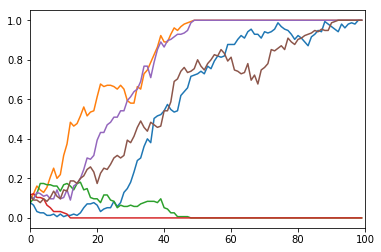

In [147]:
def trajetorias(N):
    

    plt.xlim( [0, 100])#definir limites do grafico
    #plt.ylim([0,0.12])#definir limites do grafico
    #plt.legend()    

    
    
    i=0
    while i<6:
        freq = main(N,100,0.1,0.9,0.95,1)
        plt.plot( range(len(freq)) , freq )#, label = " Frequencia " )
        i+=1
    plt.show
    return
    
interact(trajetorias, N=[10,300], continuous_update =False)

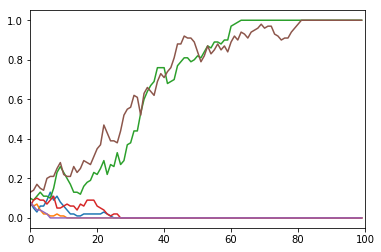

In [148]:
trajetorias(100)

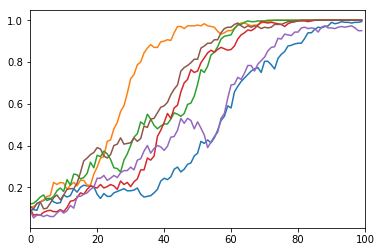

In [135]:
trajetorias(300)

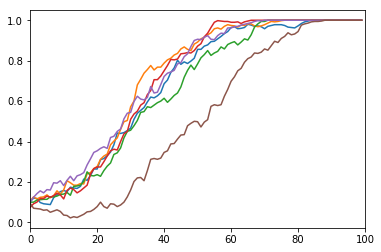

In [136]:
trajetorias(500)

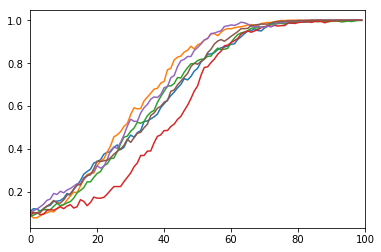

In [111]:
trajetorias(1000)